Mini-Batch Gradient Descent: Parameters are updated after computing the gradient of  the error with respect to a subset of the training set

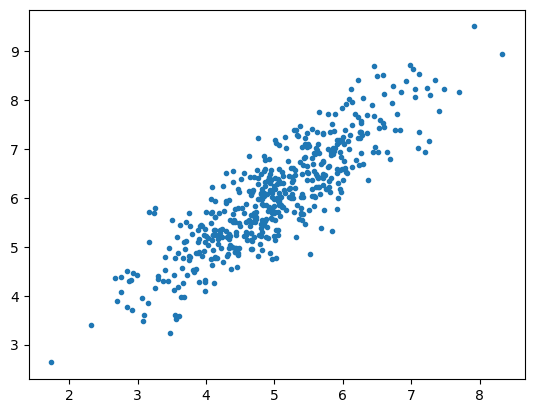

Number of examples in training set=  7200
Number of examples in testing set=  800


In [3]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
 
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)
 
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()
 
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
 
split_factor = 0.90
split = int(split_factor * data.shape[0])
 
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
 
print( "Number of examples in training set= ",(X_train.shape[0]))
print("Number of examples in testing set= ",(X_test.shape[0]))

In [4]:
# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions
 
 
def hypothesis(X, theta):
    return np.dot(X, theta)
 
# function to compute gradient of error function w.r.t. theta
 
 
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
 
# function to compute the error for current values of theta
 
 
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]
 
# function to create a list containing mini-batches
 
 
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
 
# function to perform mini-batch gradient descent
 
 
def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
 
    return theta, error_list

Bias =  [0.80001433]
Coefficients =  [[1.01767565]]


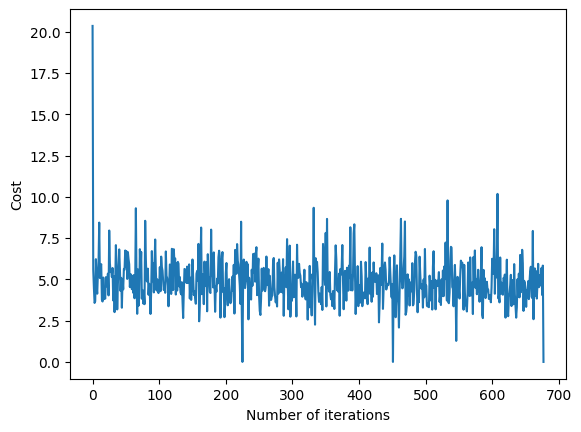

In [5]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
 
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

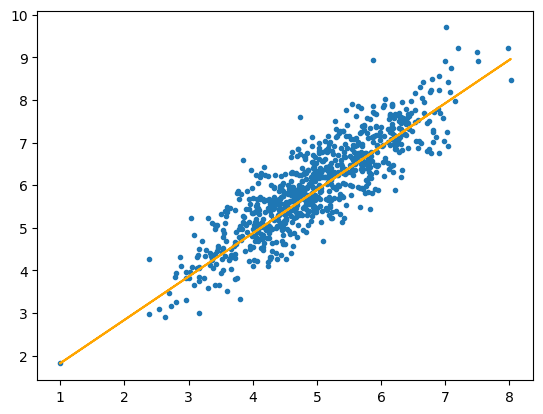

Mean absolute error =  0.4420051780542885


In [6]:
# predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker='.')
plt.plot(X_test[:, 1], y_pred, color='orange')
plt.show()
 
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)